## <center> Imbalanced Data </center>

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
model = LogisticRegression()

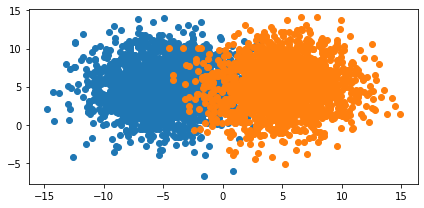

In [3]:
# Balanced Data
feature, label = make_blobs(n_samples=[2000,2000], n_features=2, 
                            centers=[(-5,5),(5,5)], random_state=47, cluster_std=3)
plt.figure(figsize=(6,3))
for cv in range(2):
    row = np.where(label==cv)
    plt.scatter(feature[row,0],feature[row,1],\
                cmap='Paired')
plt.tight_layout()
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=101)
model = LogisticRegression()
model.fit(X_train,y_train)

yp = model.predict(X_test)

confusion_matrix(y_true=y_test, y_pred=yp)


array([[388,  20],
       [ 30, 362]], dtype=int64)

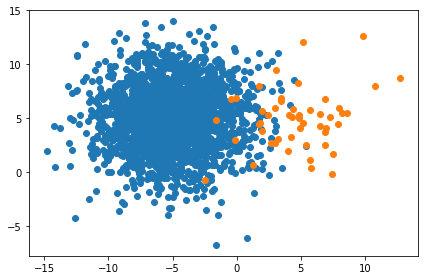

In [5]:
feature, label = make_blobs(n_samples=[2000,50], n_features=2, 
                            centers=[(-5,5),(5,5)], random_state=47, cluster_std=3)

for cv in range(2):
    row = np.where(label==cv)
    plt.scatter(feature[row,0],feature[row,1],cmap = 'Paired')

plt.tight_layout()
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=101)
model = LogisticRegression()
model.fit(X_train,y_train)

yp = model.predict(X_test)

confusion_matrix(y_true=y_test, y_pred=yp)

array([[398,   1],
       [  6,   5]], dtype=int64)

In this case, one could think that the classifier does a good job, however it's important to notice the following:
- The number of points of one blob and the other are very different and not proportional
- The misclassified blobs in the second group are bigger than the correctly classified.

### Undersample
One way to deal with a much larger class is to undersample. This removes random instances from the majority class to reduce the number of instances to be comparable to the other classes. There are a few limitations to this. If the majority class is not sufficiently large, undersampling may lead to too little data overall for the model fit or validation. If the majority class samples are not normally distributed, stochastic undersampling can misshape the class, leading to additional errors. These factors should be considered before the decision to undersample. There is an improvement with undersampling the majority class in the synthetic data set.


In [7]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler as RUS

In [8]:
feature, label = make_blobs(n_samples=[2000,50], n_features=2, 
                            centers=[(-5,5),(5,5)], random_state=47, cluster_std=3)

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=101)

under = RUS(sampling_strategy='majority', random_state=101)
steps = [('u',under),('LogReg',model)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

yp = model.predict(X_test)
confusion_matrix(y_true=y_test, y_pred=yp)

array([[376,  23],
       [  0,  11]], dtype=int64)

In this case a better behaviour is shown, the undersampled class is all well classified!

### Oversample Minority Class
Oversampling is the opposite of undersampling. SMOTE (Synthetic Minority Oversampling TEchnique) is a method to oversample the minority class. SMOTE creates artificial sample points in the same area space as the minority class, allowing the model to weight the minority class and improve classifier accuracy. It must be noted, however, that these additional points are synthetic and if the minority class space is similar to that of another class, could lead to misclassification of other classes due to the expansion of the minority bounds in hyperspace.

In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
feature, label = make_blobs(n_samples=[2000,50], n_features=2, 
                            centers=[(-5,5),(5,5)], random_state=47, cluster_std=3)

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=101)

over = SMOTE(sampling_strategy='minority', random_state=101, k_neighbors=3)
steps = [('o',over),('LogReg',model)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

yp = model.predict(X_test)
confusion_matrix(y_true=y_test, y_pred=yp)

array([[382,  17],
       [  1,  10]], dtype=int64)

In this case the performance of the classifier is better for the first group and worst for the second, however the job is well done and the unbalanced class is well classified.